# Lab Session 01

### MATLAB Code 
### Reading, writing and querying images
```
imfinfo('cameraman.tif') 
Img=imread('cameraman.tif'); 
imwrite(Img, 'cameraman.jpg',’jpg’);
imfinfo('cameraman.jpg');

```

### Python Code


In [7]:
from PIL import Image

# Open the TIF image
img = Image.open(r'imdata\cameraman.tif')
print("Original Image Info:", img.format, img.size, img.mode)

# Convert the image to RGB mode before saving it as JPG
img = img.convert('RGB') # This line is added to convert the image to RGB

# Save the image as JPG
img.save(r'Output Images\cameraman.jpg', 'JPEG')

# Open the new JPG image and display its info
img_jpg = Image.open(r'Output Images\cameraman.jpg')
print("New Image Info:", img_jpg.format, img_jpg.size, img_jpg.mode)

Original Image Info: TIFF (256, 256) L
New Image Info: JPEG (256, 256) RGB


### MATLAB Code

### Displaying images

```
A=imread(‘cameraman.tif ’); %Read in intensity image
imshow(A); %First display image using imshow
imagesc(A); %Next display image using imagesc
axis image; %Correct aspect ratio of displayed image
axis off; %Turn off the axis labelling
colormap(gray);



- MATLAB's imshow is used for displaying images with intensity values normalized (e.g., 0–1 or 0–255 for grayscale and color images).
- MATLAB's imagesc is used to display arrays of any numerical range by automatically scaling the values to the displayable range.

- Differences and Unified Functionality in Python

    - Matplotlib's imshow can serve as both imshow and imagesc depending on how it's used:

        - If the data is within 0–1 or 0–255, it behaves like MATLAB's imshow.
        - For any numerical range, it behaves like MATLAB's imagesc by automatically scaling values.

    - OpenCV's imshow always requires normalized image data. If your data is outside the 0–255 range, you must scale it manually

### Python Code


<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8788\1708132056.py:6: SyntaxWarning: invalid escape sequence '\c'
  A = np.array(Image.open('imdata\cameraman.tif'))


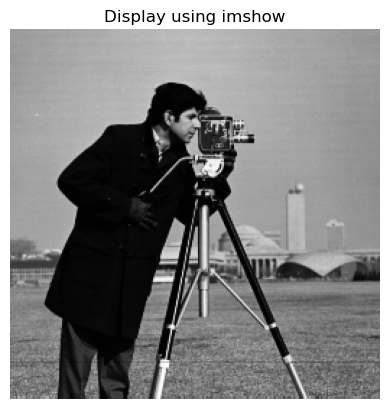

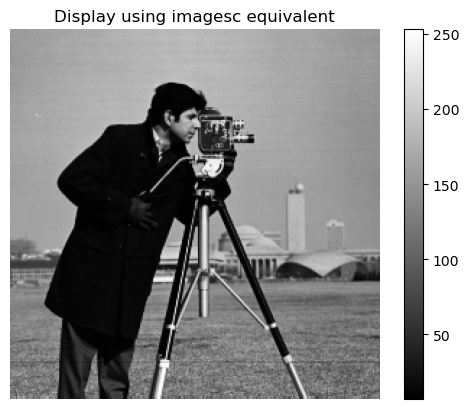

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Read the intensity image
A = np.array(Image.open('imdata\cameraman.tif'))

# Display the image using imshow
plt.figure()
plt.title("Display using imshow")
plt.imshow(A, cmap='gray')
plt.axis('off')  # Turn off axis labeling
plt.show()

# Display the image using imshow but with auto aspect ratio
plt.figure()
plt.title("Display using imagesc equivalent")
plt.imshow(A, cmap='gray', aspect='auto')
plt.axis('image')  # Correct the aspect ratio
plt.axis('off')  # Turn off axis labeling
plt.colorbar()  # Add a colorbar (optional)
plt.show()


### MATLAB Code Matrix visualization for images

```
A = magic(5); % Create an image(2D Matrix) of a 5-by-5 magic square.
image(A); %Display this 2D image with intrinsic coordinates. Here, %the x-and y- coordinate ranges are both [1 5] 
axis image axis image %Correct aspect ratio of displayed image
colormap(gca, jet(25)) %Set colourmap to jet (false colour)
title('Image Displayed with Intrinsic Coordinates');

```

### Python Code


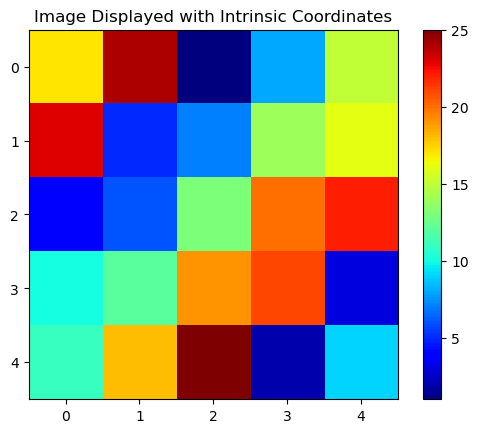

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 5x5 magic square (similar to MATLAB's magic function)
def magic(n):
    if n % 2 == 1:  # Odd-order magic square
        magic_square = np.zeros((n, n), dtype=int)
        i, j = 0, n // 2
        for num in range(1, n * n + 1):
            magic_square[i, j] = num
            i_new, j_new = (i - 1) % n, (j + 1) % n
            if magic_square[i_new, j_new]:
                i += 1
            else:
                i, j = i_new, j_new
        return magic_square
    else:
        raise ValueError("Magic square implementation is for odd numbers only")

# Create a 5x5 magic square
A = magic(5)

# Display the 2D image with intrinsic coordinates
plt.figure()
plt.imshow(A, interpolation='nearest')  # Display the 2D matrix
plt.axis('image')  # Correct aspect ratio
plt.colorbar()  # Add a colorbar
plt.set_cmap('jet')  # Set colormap to 'jet'
plt.title('Image Displayed with Intrinsic Coordinates')
plt.show()

### Matlab code to creates a simple RGB image

imSize = 200;  % Define the size of the RGB image (200x200)

RGB = reshape(ones(imSize,1) * reshape(jet(imSize), 1, imSize*3), ...
              [imSize, imSize, 3]);  
% Step-by-step:

% 1. `jet(imSize)` creates a colormap with 200 colors.

% 2. `reshape(jet(imSize), 1, imSize*3)` reshapes the colormap into a single row.

% 3. `ones(imSize,1) * ...` repeats the color row across 200 rows.

% 4. `reshape(..., [imSize, imSize, 3])` creates a 200x200x3 RGB image.

imshow(RGB);  

% Display the RGB image

title('Original RGB Image');  % Add a title


Python’s Matplotlib library has a jet colormap and functions to manipulate and display images, making it straightforward to replicate the MATLAB functionality.

### Python Code

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8788\3344482774.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet_cmap = get_cmap('jet')


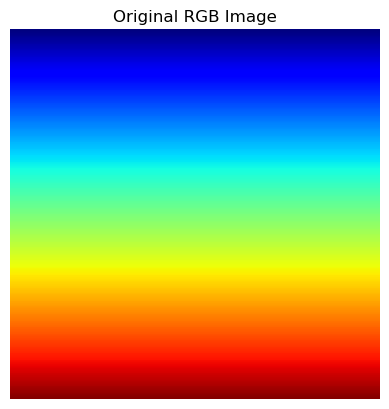

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Step 1: Define image size
im_size = 200

# Step 2: Create the 'jet' colormap with 200 colors
jet_cmap = get_cmap('jet')

# Step 3: Generate the RGB image
RGB = np.zeros((im_size, im_size, 3))  # Initialize a 200x200x3 RGB array
for i in range(im_size):
    RGB[i, :, :] = jet_cmap(i / im_size)[:3]  # Normalize 'i' to the range [0, 1]

# Step 4: Display the RGB image
plt.imshow(RGB)
plt.title('Original RGB Image')
plt.axis('off')  # Hide axis for better visualization
plt.show()


### Matlab code to separates the RGB color channels of an image and displays each channel as a grayscale intensity image.

[R,G,B] = imsplit(RGB);     %Separate the three color channels. 

Figure, subplot(1,3,1) 

imshow(R) 

title('Red Channel') 

subplot(1,3,2) 

imshow(G) 

title('Green Channel') 

subplot(1,3,3) 

imshow(B) 

title('Blue Channel')

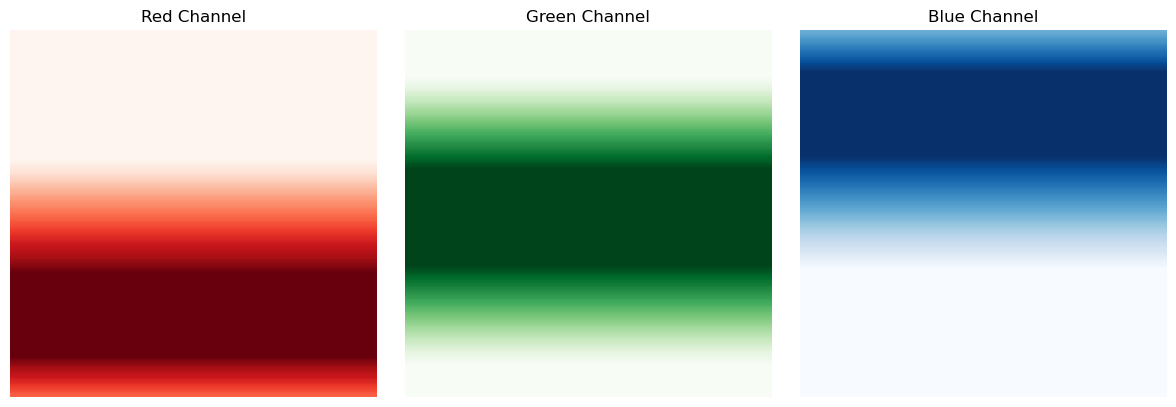

In [16]:
# Step 1: Separate the RGB channels
R = RGB[:, :, 0]  # Red channel
G = RGB[:, :, 1]  # Green channel
B = RGB[:, :, 2]  # Blue channel

# Step 2: Display the channels
plt.figure(figsize=(12, 4))

# Red Channel
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Green Channel
plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Blue Channel
plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

### Matlab code to separates the RGB color channels of an image and displays each channel with black background

allBlack = zeros(size(RGB,1,2),class(RGB)); 

justR = cat(3,R,allBlack,allBlack); 

justG = cat(3,allBlack,G,allBlack); 

justB = cat(3,allBlack,allBlack,B); 

figure 

montage({justR,justG,justB},'Size',[1 3], "BackgroundColor",'w',"BorderSize",10); 
 
title('Color Representation of the Red, Green, and Blue Color Channels'); 

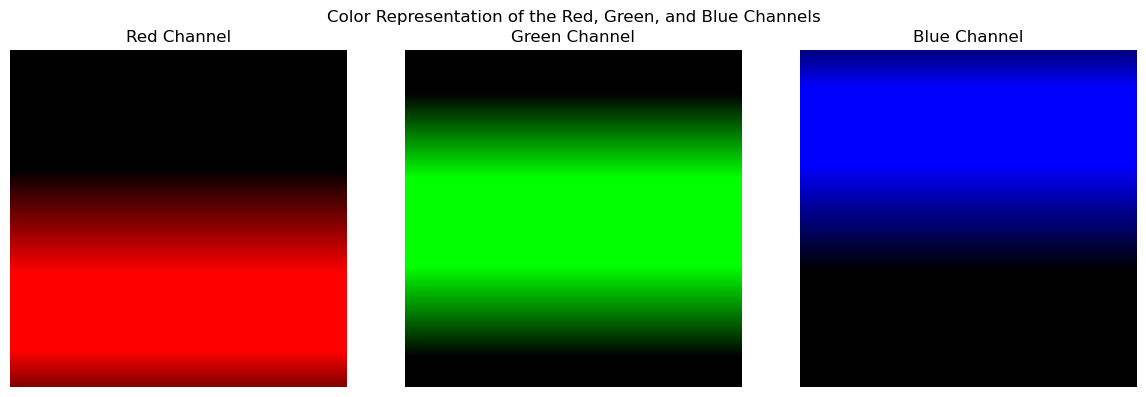

In [17]:
all_black = np.zeros_like(R)
justR = np.stack([R, all_black, all_black], axis=2)  # Red active
justG = np.stack([all_black, G, all_black], axis=2)  # Green active
justB = np.stack([all_black, all_black, B], axis=2)  # Blue active

# Display using a montage equivalent
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(justR)
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(justG)
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(justB)
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.suptitle('Color Representation of the Red, Green, and Blue Channels')
plt.tight_layout()
plt.show()

### Matlab Code for Converting image types

D = imread('onion.png');         % Read the RGB image

Dgray = rgb2gray(D);             % Convert the RGB image to grayscale

subplot(2,1,1); imshow(D); axis image; % Display the original RGB image

subplot(2,1,2); imshow(Dgray);          % Display the grayscale image



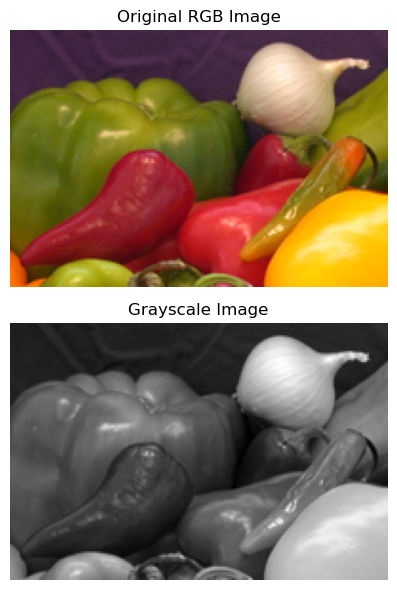

In [20]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the RGB image
D = cv2.imread('imdata/onion.png')  # OpenCV reads images in BGR format
D = cv2.cvtColor(D, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Step 2: Convert the RGB image to grayscale
Dgray = cv2.cvtColor(D, cv2.COLOR_RGB2GRAY)

# Step 3: Display the images side by side
plt.figure(figsize=(10, 6))

# Display the original RGB image
plt.subplot(2, 1, 1)
plt.imshow(D)
plt.axis('off')  # Hide axes
plt.title('Original RGB Image')

# Display the grayscale image
plt.subplot(2, 1, 2)
plt.imshow(Dgray, cmap='gray')
plt.axis('off')  # Hide axes
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()


### Matlab Code for Accessing pixel values 
B = imread('cell.tif');       % Read a grayscale intensity image

imview(B);                    % Open the interactive viewer for the grayscale image

D = imread('onion.png');      % Read an RGB color image

imview(D);                    % Open the interactive viewer for the RGB image

B(25, 50)                     % Print the pixel value at (25, 50)

B(25, 50) = 255;              % Set the pixel at (25, 50) to white

imshow(B);                    % Display the modified grayscale image

D(25, 50, :)                  % Print the RGB pixel values at (25, 50)

D(25, 50, 1)                  % Print the red channel value at (25, 50)


In [25]:
import plotly.express as px
import cv2

# Load the image
img = cv2.imread('imdata/onion.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create an interactive plot
fig = px.imshow(img, title="Interactive Image Viewer (Hover to Show Pixel Values)")

# Show the plot
# ADD X AND Y AXIS LABELS TO THE PLOT
fig.update_xaxes(title_text='X-axis')
fig.update_yaxes(title_text='Y-axis')
fig.show()
